In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings as wr 
import seaborn as sns

In [2]:
file = pd.read_csv('numeric and cat dada.csv')
print(file.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [4]:
print(file.describe())


       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [5]:
print(file.isnull())


     total_bill    tip    sex  smoker    day   time   size
0         False  False  False   False  False  False  False
1         False  False  False   False  False  False  False
2         False  False  False   False  False  False  False
3         False  False  False   False  False  False  False
4         False  False  False   False  False  False  False
..          ...    ...    ...     ...    ...    ...    ...
239       False  False  False   False  False  False  False
240       False  False  False   False  False  False  False
241       False  False  False   False  False  False  False
242       False  False  False   False  False  False  False
243       False  False  False   False  False  False  False

[244 rows x 7 columns]


In [6]:
print(file.notnull())


     total_bill   tip   sex  smoker   day  time  size
0          True  True  True    True  True  True  True
1          True  True  True    True  True  True  True
2          True  True  True    True  True  True  True
3          True  True  True    True  True  True  True
4          True  True  True    True  True  True  True
..          ...   ...   ...     ...   ...   ...   ...
239        True  True  True    True  True  True  True
240        True  True  True    True  True  True  True
241        True  True  True    True  True  True  True
242        True  True  True    True  True  True  True
243        True  True  True    True  True  True  True

[244 rows x 7 columns]


In [7]:
print(file.shape)


(244, 7)


In [8]:
print(file.dtypes)


total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [9]:
print(file.nunique())


total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64


In [10]:
print(file.columns.tolist())


['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


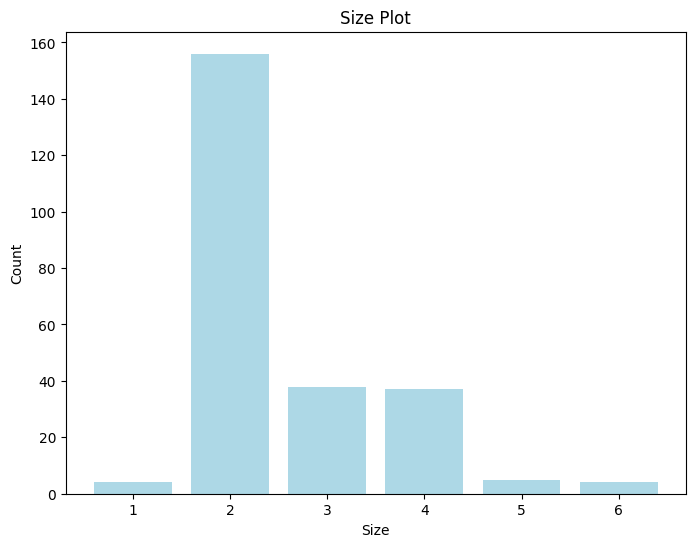

In [11]:
# Graph plot
quality_counts = file['size'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(quality_counts.index,quality_counts,color ='lightblue' )
plt.title('Size Plot')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

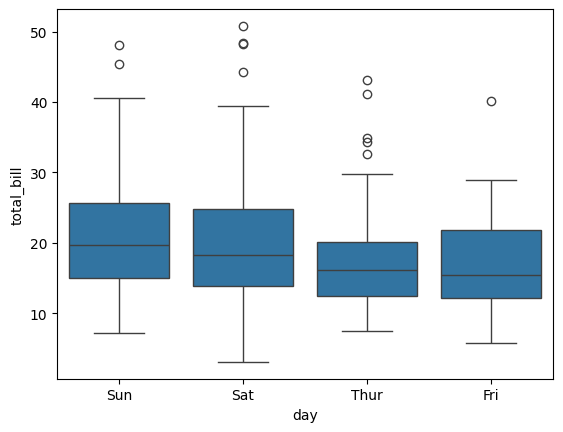

In [12]:
# plotting box plot
sns.boxplot(x='day',y='total_bill',data=file)
plt.show()

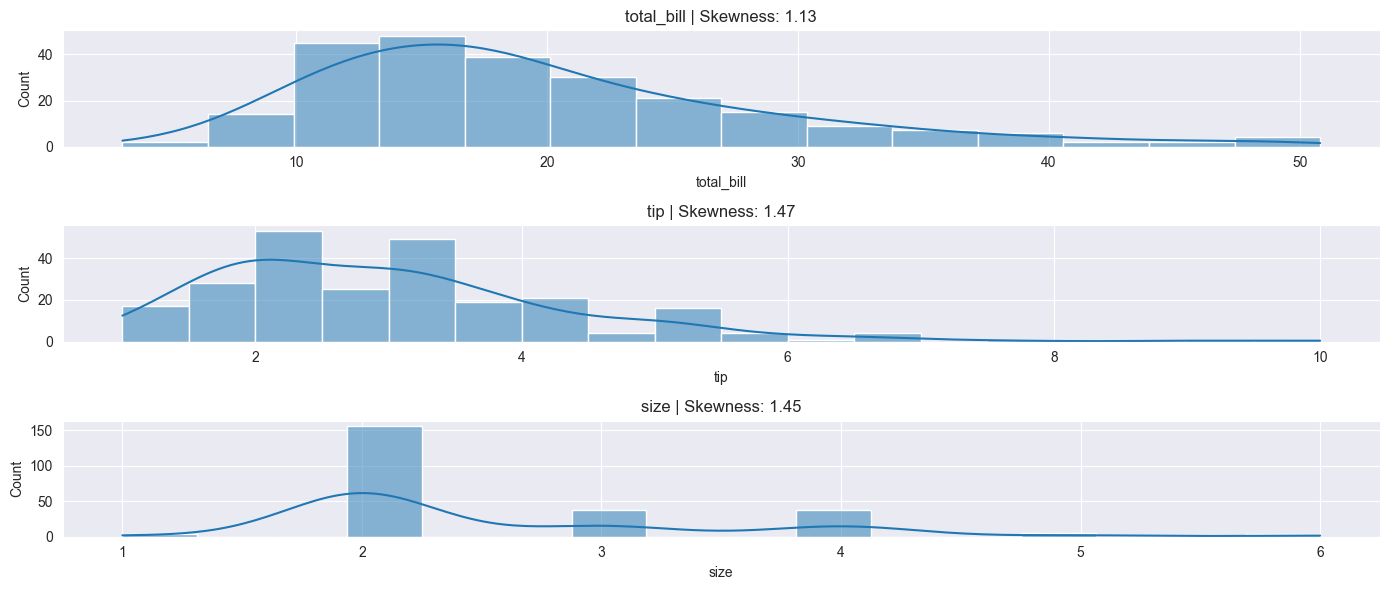

In [13]:
# skewness plot
sns.set_style("darkgrid")
numerical_columns = file.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 2)) #scale of width and height
for idx, feature in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, idx + 1) #sub_figure
    sns.histplot(file[feature], kde=True)
    plt.title(f'{feature} | Skewness: {round(file[feature].skew(), 2)}')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9972\2075441980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='day',y='total_bill',data = file,palette='Pastel2')


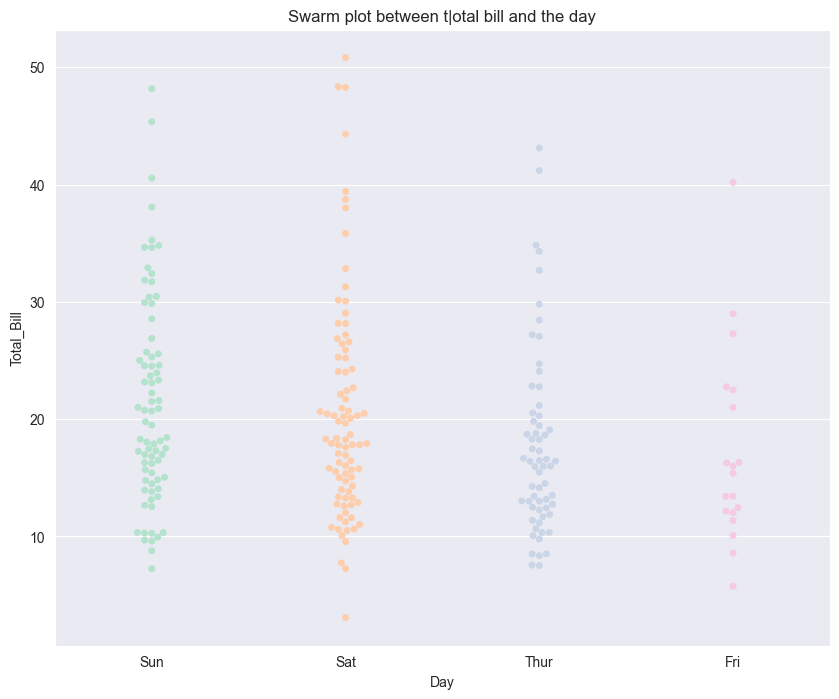

In [14]:
# Swarm plot
plt.figure(figsize=(10,8))
sns.swarmplot(x='day',y='total_bill',data = file,palette='Pastel2')
plt.title('Swarm plot between t|otal bill and the day')
plt.xlabel('Day')
plt.ylabel('Total_Bill')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

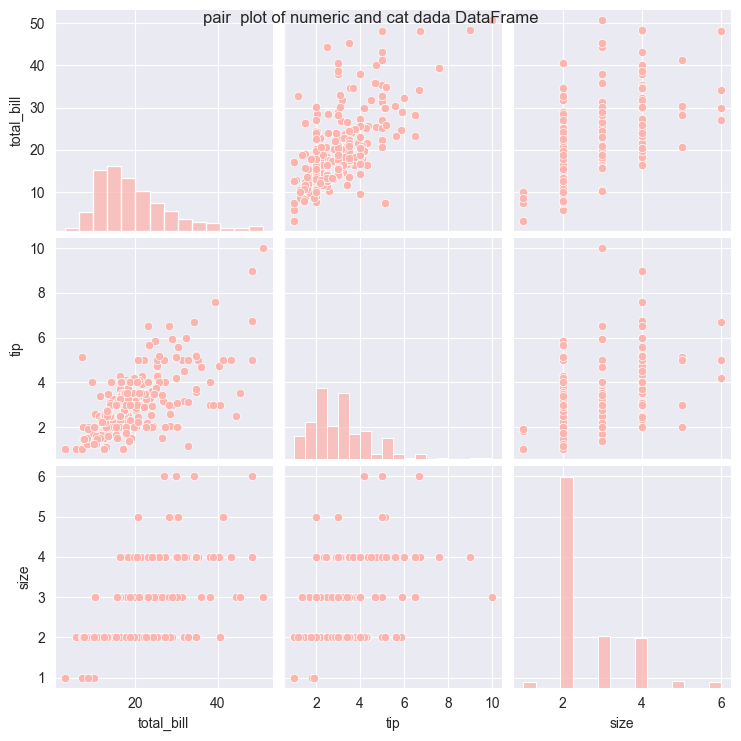

In [15]:
# pair plot
sns.set_palette('Pastel1')
plt.figure(figsize=(10,6))
sns.pairplot(file)
plt.suptitle('pair  plot of numeric and cat dada DataFrame')
plt.show()

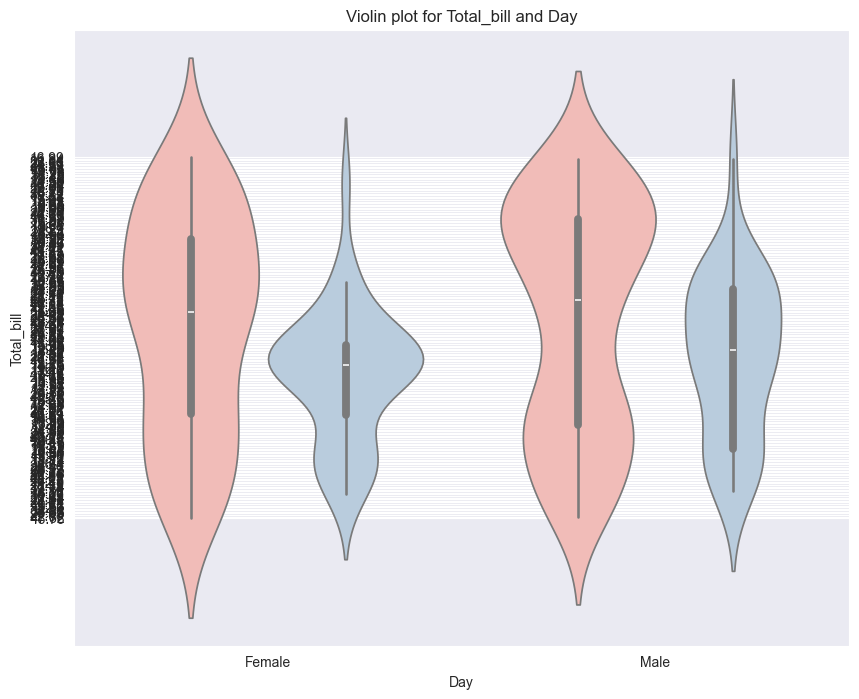

In [24]:
# violin plot
file['total_bill'] = file['total_bill'].astype(str)
plt.figure(figsize=(10,8))
sns.violinplot(x= 'sex',y='total_bill',data = file , palette = 'Pastel1',legend=False,hue='time')
plt.title('Violin plot for Total_bill and Day')
plt.xlabel('Day')
plt.ylabel('Total_bill')
plt.show()

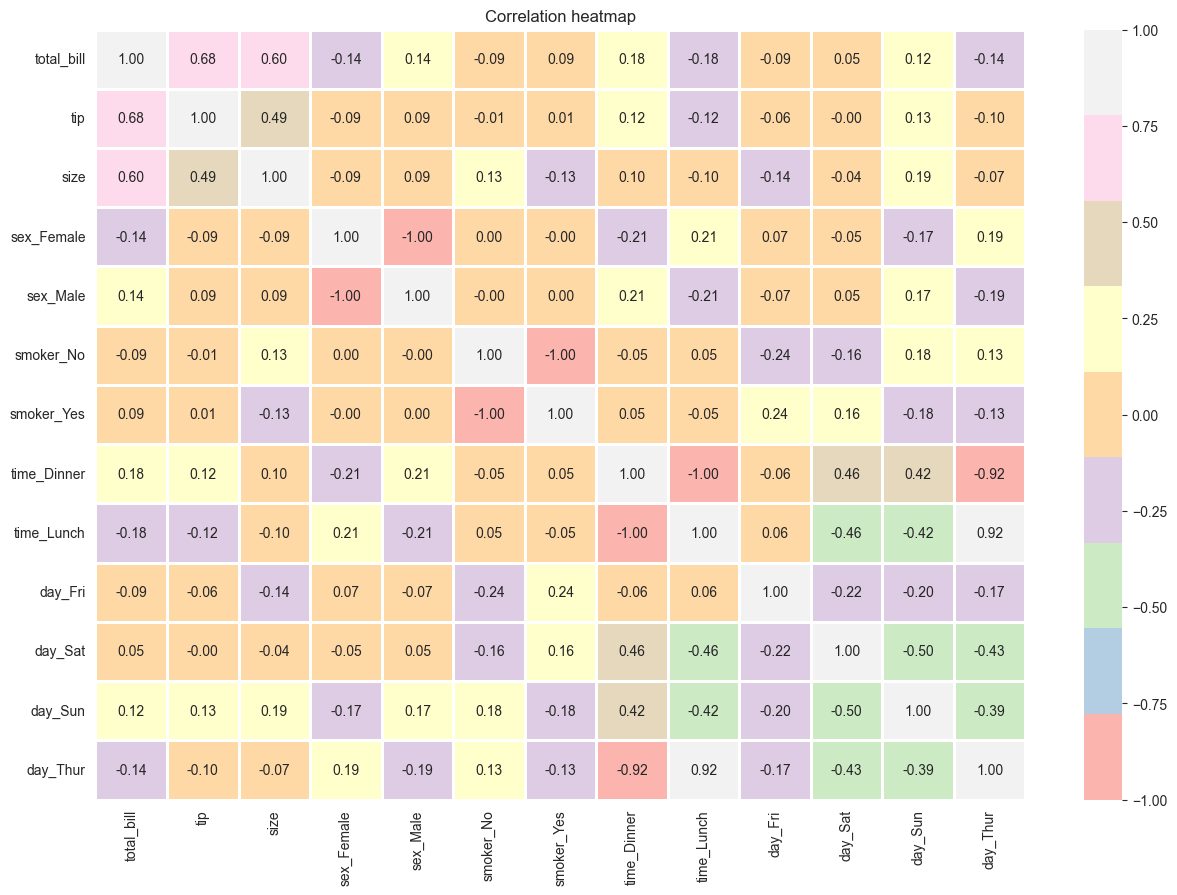

In [25]:
# encoding categorical data
Data = file.copy()
Heatmap_Data = pd.get_dummies(Data,columns=['sex','smoker','time','day'])
# correlation Matrix or correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(Heatmap_Data.corr(),annot=True,fmt='.2f',cmap ='Pastel1',linewidths=2 )
plt.title('Correlation heatmap')
plt.show()